# Walter Piper - Springboard Assignment - Craft a Story from a Dataset

## Stock price analysis of Covid-19 vaccine companies

In [90]:
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

### Data Wrangling

In [2]:
# daily stock price by ticker - from Yahoo finance
paths = glob('D:\\Springboard\\Capstone2\\Data Viz Assignment\\data\\**.csv')
paths

['D:\\Springboard\\Capstone2\\Data Viz Assignment\\data\\6185_HK.csv',
 'D:\\Springboard\\Capstone2\\Data Viz Assignment\\data\\AZN.csv',
 'D:\\Springboard\\Capstone2\\Data Viz Assignment\\data\\BIBCL_BO.csv',
 'D:\\Springboard\\Capstone2\\Data Viz Assignment\\data\\BNTX.csv',
 'D:\\Springboard\\Capstone2\\Data Viz Assignment\\data\\JNJ.csv',
 'D:\\Springboard\\Capstone2\\Data Viz Assignment\\data\\MRNA.csv',
 'D:\\Springboard\\Capstone2\\Data Viz Assignment\\data\\PFE.csv',
 'D:\\Springboard\\Capstone2\\Data Viz Assignment\\data\\SHTDY.csv',
 'D:\\Springboard\\Capstone2\\Data Viz Assignment\\data\\SVA.csv']

In [3]:
#ticker names
tickers = [paths[i].split('\\')[-1].split('.')[0] for i in range(len(paths))]
print(tickers)

['6185_HK', 'AZN', 'BIBCL_BO', 'BNTX', 'JNJ', 'MRNA', 'PFE', 'SHTDY', 'SVA']


In [121]:
# get all closing prices into one dataframe 
df_list = []
for ticker, path in zip(tickers, paths):
    df = pd.read_csv(path)
    df.index = pd.to_datetime(df['Date'])
    df = df[['Close']]
    df.columns = [ticker]
    df_list.append(df)

df_all = pd.concat(df_list, ignore_index=False, axis=1, join='outer')
display(df_all.head())
display(df_all.tail())
print(df_all.info())

,6185_HK,AZN,BIBCL_BO,BNTX,JNJ,MRNA,PFE,SHTDY,SVA
Date,,,,,,,,,
2019-09-16,34.799999,42.509998,8.00,NaN,129.539993,17.049999,34.943073,17.320000,6.47
2019-09-17,34.700001,43.130001,7.40,NaN,129.669998,17.660000,34.629982,17.570000,6.47
2019-09-18,34.700001,43.570000,7.03,NaN,130.410004,17.780001,34.516129,17.780001,6.47
2019-09-19,34.799999,44.610001,6.51,NaN,130.110001,17.900000,34.639469,17.639999,6.47
2019-09-20,35.599998,45.180000,7.02,NaN,131.649994,18.070000,34.810246,17.219999,6.47


,6185_HK,AZN,BIBCL_BO,BNTX,JNJ,MRNA,PFE,SHTDY,SVA
Date,,,,,,,,,
2021-03-08,273.000000,48.189999,58.849998,90.290001,157.399994,123.470001,34.349998,11.245,6.47
2021-03-09,264.399994,49.270000,57.700001,96.480003,157.699997,130.869995,34.450001,11.275,6.47
2021-03-10,277.200012,49.810001,56.549999,98.019997,159.149994,129.750000,34.930000,11.286,6.47
2021-03-11,295.799988,48.669998,NaN,102.599998,159.139999,140.470001,34.709999,11.490,6.47
2021-03-12,297.799988,48.419998,55.450001,103.279999,159.600006,136.990005,34.939999,11.352,6.47


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 387 entries, 2019-09-16 to 2021-03-12
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   6185_HK   369 non-null    float64
 1   AZN       376 non-null    float64
 2   BIBCL_BO  370 non-null    float64
 3   BNTX      357 non-null    float64
 4   JNJ       376 non-null    float64
 5   MRNA      376 non-null    float64
 6   PFE       376 non-null    float64
 7   SHTDY     376 non-null    float64
 8   SVA       376 non-null    float64
dtypes: float64(9)
memory usage: 30.2 KB
None


Text(0.5, 1.0, 'Vaccine Stocks - Close Prices')

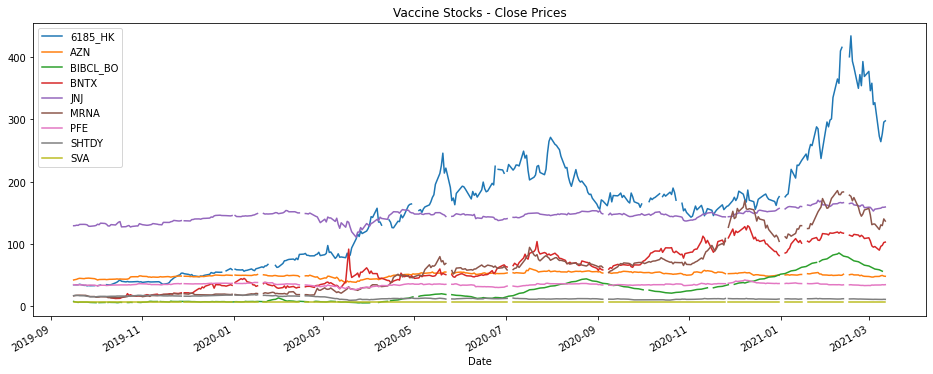

In [11]:
df_all.plot(figsize=[16,6])
plt.title('Vaccine Stocks - Close Prices')

### Dates of interest

In [8]:
# Vaccine approval dates for largest economies (according to https://www.investopedia.com/insights/worlds-top-economies/ ) plus WHO
# EU countries were grouped into a single EU label

# 19 JURISDICTIONS TOTAL: 
# Australia, Brazil, Canada, China, EU, India, Indonesia, Japan, Mexico, Nigeria, 
# Russia, Saudi Arabia, South Korea, Switzerland, Thailand, Turkey, UK, US, WHO

# https://www.raps.org/news-and-articles/news-articles/2020/3/covid-19-vaccine-tracker

# Pfizer/BNTX approval dates
PFE_approvals = {'Australia':'2021-01-25', 'Brazil':'2021-02-23', 'Canada':'2020-12-09', 'EU':'2020-12-21',
                     'Japan':'2021-02-14', 'Mexico':'2020-12-11', 'Saudi Arabia':'2020-12-10', 'South Korea':'2021-03-05',
                     'Switzerland':'2021-01-12', 'UK':'2020-12-02', 'US':'2020-12-11', 'WHO':'2020-12-31'}
# BNTX_approvals = PFE_approvals # BNTX collaborated with PFE to produce a vaccine

# Moderna
MRNA_approvals = {'Canada':'2020-12-09', 'EU':'2021-01-06', 'Switzerland':'2021-01-08', 'UK':'2021-01-08', 'US':'2020-12-18'}

# AstraZenica
AZN_approvals = {'Australia':'2020-12-30', 'Brazil':'2021-01-17', 'Canada':'2021-02-26', 'EU':'2021-01-29', 'India':'2021-01-03',
                'Indonesia':'2021-03-09', 'Japan':'2021-02-05', 'Mexico':'2021-01-04', 'Nigeria':'2021-02-18', 'South Korea':'2021-02-10',
                'Thailand':'2021-01-21', 'UK':'2020-12-29', 'WHO':'2021-02-15'}

# Johnson & Johnson
JNJ_approvals = {'Canada':'2021-03-05', 'EU':'2021-03-11', 'US':'2021-02-27', 'WHO':'2021-03-12'}

# Sinovac
SVA_approvals = {'Brazil':'2021-01-17', 'China':'2021-02-06', 'Indonesia':'2021-01-12', 'Mexico':'2021-02-10', 
                 'Thailand':'2021-02-22', 'Turkey':'2021-01-14'}

# Sinopharm
SHTDY_approvals = {'China':'2020-12-30'}
# Sinopharm 2nd vaccine candidate
SHTDY_2_approvals = {'China':'2021-02-27'}

#CanSino Biologics (ticker: "6185.HK")
CanSino_approvals = {'China':'2021-02-25', 'Mexico':'2021-02-10'}

# Bharet (ticker: BIBCL.BO)
BIBCL_approvals = {'India':'2021-01-03'}

# Russian state-funded vaccines (No associated tickers)
SputnikV_approvals = {'Mexico':'2021-02-04', 'Russia':'2020-08-11'}
CoviVac_approvals = {'Russia':'2021-02-20'}

In [21]:
df_all.index.get_loc('2020-08-11')

234

In [22]:
df_all.index.get_loc('2021-03-12')

386

In [68]:
num_approvals_dict = {'PFE / BNTX':len(PFE_approvals),
                      'MRNA':len(MRNA_approvals), 'AZN':len(AZN_approvals), 
                      'JNJ':len(JNJ_approvals), 'SVA':len(SVA_approvals), 'SHTDY_1':len(SHTDY_approvals),
                      'SHTDY_2':len(SHTDY_2_approvals), 'CanSino':len(CanSino_approvals), 
                      'BIBCL.BO':len(BIBCL_approvals), 'Sputnik V':len(SputnikV_approvals), 'CoviVac':len(CoviVac_approvals)}
num_approvals_dict

{'PFE / BNTX': 12,
 'MRNA': 5,
 'AZN': 13,
 'JNJ': 4,
 'SVA': 6,
 'SHTDY_1': 1,
 'SHTDY_2': 1,
 'CanSino': 2,
 'BIBCL.BO': 1,
 'Sputnik V': 2,
 'CoviVac': 1}

In [103]:
# All vaccines approved are either Chinese, Russian, Indian, or Western
Western_vaccines = ['PFE / BNTX', 'MRNA', 'AZN', 'JNJ']
Chinese_vaccines = ['SVA', 'SHTDY_1', 'SHTDY_2', 'CanSino']
Russian_vaccines = ['Sputnik V', 'CoviVac']
Indian_vaccines = ['BIBCL.BO']

vax_nums = []
approval_nums = []

for origin, vax_list in zip(['US/UK/EU', 'China', 'Russia', 'India'],
                            [Western_vaccines, Chinese_vaccines, Russian_vaccines, Indian_vaccines]):
    counting = 0
    counting_vax = 0
    for vax_name, num_approvals in num_approvals_dict.items():
        if vax_name in vax_list:
            counting += num_approvals
            counting_vax += 1
    print(origin, ':', counting, 'approval(s) from ', counting_vax, 'vaccine(s)')
    vax_nums.append(counting_vax)
    approval_nums.append(counting)

US/UK/EU : 34 approval(s) from  4 vaccine(s)
China : 10 approval(s) from  4 vaccine(s)
Russia : 3 approval(s) from  2 vaccine(s)
India : 1 approval(s) from  1 vaccine(s)


Text(0.5, 1.0, 'Number of approval events per vaccine origin region')

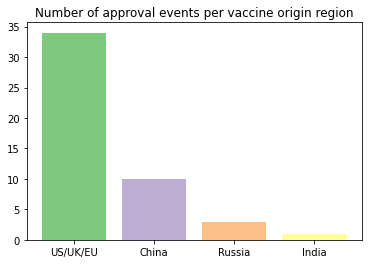

In [75]:
plt.bar(['US/UK/EU', 'China', 'Russia', 'India'], [34, 10, 3, 1], color=['#7fc97f','#beaed4','#fdc086','#ffff99'])
plt.title('Number of approval events per vaccine origin region')

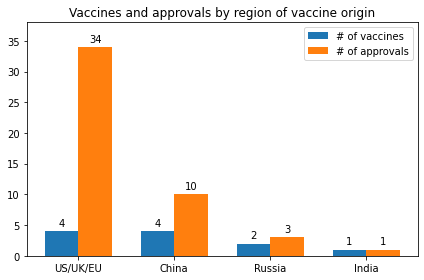

In [106]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['US/UK/EU', 'China', 'Russia', 'India']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, vax_nums, width, label='# of vaccines')
rects2 = ax.bar(x + width/2, approval_nums, width, label='# of approvals')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Scores')
ax.set_title('Vaccines and approvals by region of vaccine origin')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
ax.set_ylim(0,38)

plt.show()

### Visualizations

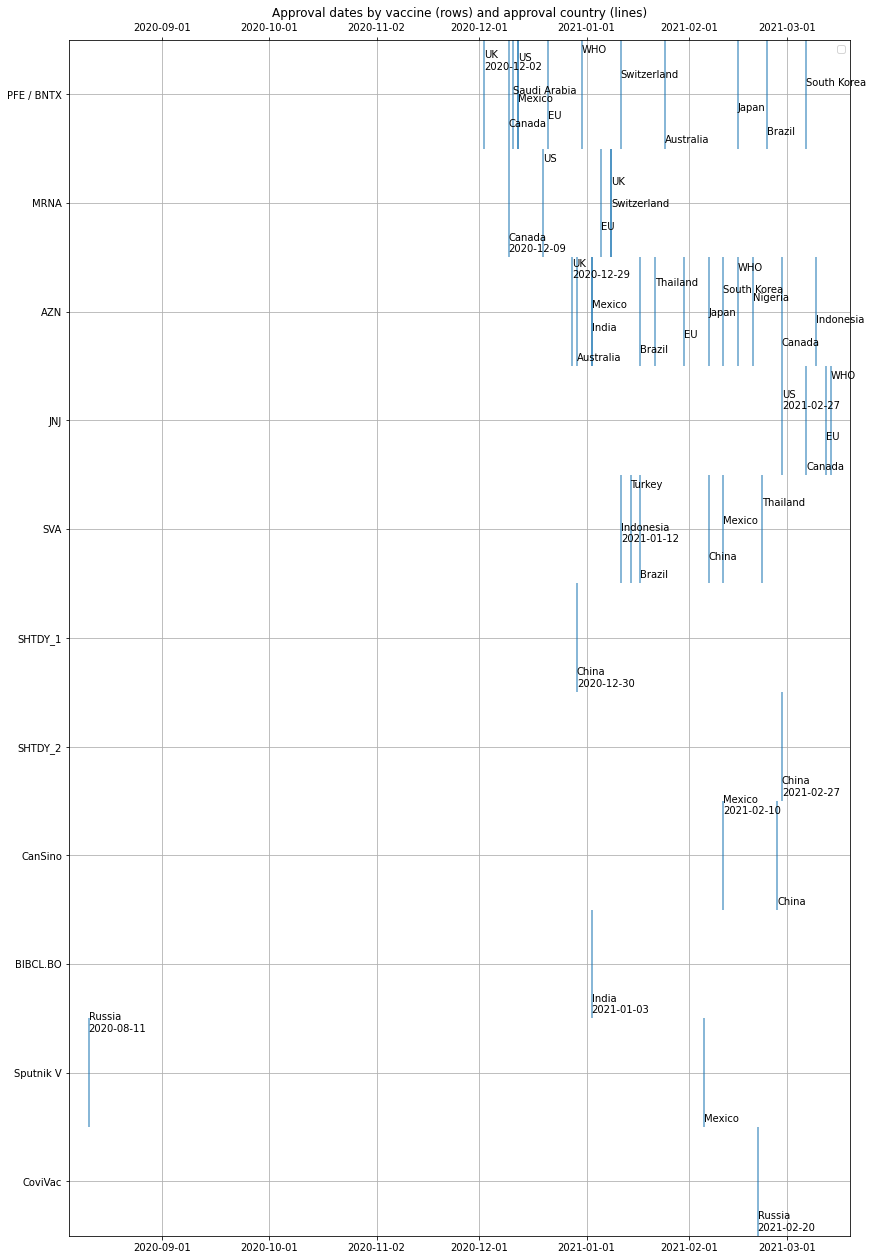

In [157]:
def plot_approvals_per_vaccine(approval_dates, ax, start_date='2019-09-16', end_date='2021-03-12', ymin=0, ymax=1, alpha=0.7, only_annotate_first=False):
    """Show when vaccines are approved by different jurisdictions"""
    countries = list(approval_dates.keys())
    dates = list(approval_dates.values())
    datelength = df_all.index.get_loc(end_date)
    #ax.set_xlim(0, datelength)
    
    index_locs = []
    for date in dates:
        try: 
            index_locs.append( df_all.index.get_loc(date) )
        except:
            try:
                new_day = int(date.split('-')[-1]) + 1
                date = date[:8]+str(new_day)
                index_locs.append( df_all.index.get_loc(date) )
            except:
                new_day = int(date.split('-')[-1]) - 2
                date = date[:8]+str(new_day)
                index_locs.append( df_all.index.get_loc(date) )
                
    #index_locs = [df_all.index.get_loc(date) for date in dates]
    ax.vlines(index_locs, [ymin]*len(index_locs), [ymax]*len(index_locs), alpha=alpha)
    
    yvals = np.linspace(ymin+0.05, ymax-0.12, len(countries))
    
    for i in range(len(countries)):
        if index_locs[i] == np.min(index_locs):
            ax.annotate(list(countries)[i]+'\n'+list(dates)[i], (index_locs[i], yvals[i]) )
        else:
            if only_annotate_first==False:
                ax.annotate(list(countries)[i], (index_locs[i], yvals[i]) ) # Only show date on first approval to avoid overcrowding
        
    ax.legend('')

fig, ax = plt.subplots(1,1, figsize=[14,22])
#df_all.plot(color='white', ax=ax)
approval_dates_list = [PFE_approvals, MRNA_approvals, AZN_approvals, JNJ_approvals, SVA_approvals, 
                      SHTDY_approvals, SHTDY_2_approvals, CanSino_approvals, BIBCL_approvals, SputnikV_approvals, CoviVac_approvals]
for i, approval_dates in enumerate(approval_dates_list[::-1]):
    plot_approvals_per_vaccine(approval_dates, ax, ymin=i, ymax=i+1)
ax.set_xlim(230, 390)
ax.set_ylim(0, len(approval_dates_list))
ax.set_yticks(np.arange(0.5, 11.5, 1))
ax.set_yticklabels(['PFE / BNTX', 'MRNA', 'AZN', 'JNJ', 'SVA', 'SHTDY_1', 'SHTDY_2', 'CanSino', 'BIBCL.BO', 'Sputnik V', 'CoviVac'][::-1])
#plt.gca().invert_yaxis()



# Set ticks on both sides of axes on
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
xaxis_date_labels = ['2020-09-01', '2020-10-01','2020-11-02','2020-12-01','2021-01-01','2021-02-01','2021-03-01']
index_vals = [df_all.index.get_loc(string) for string in xaxis_date_labels]
ax.set_xticks(index_vals)
ax.set_xticklabels(xaxis_date_labels)
#ax.set_xticklabels(df_all.index[list(np.arange(230,390,30))].strftime("%Y-%m-%d"))
ax.grid()
ax.set_title('Approval dates by vaccine (rows) and approval country (lines)')
plt.show()

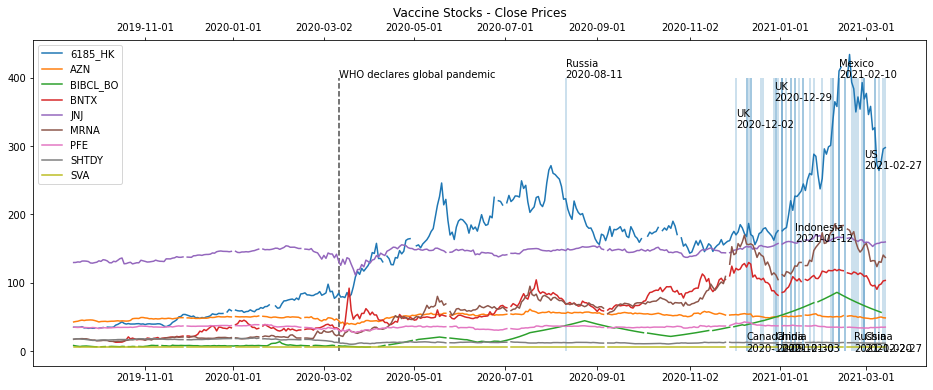

In [158]:
fig, ax = plt.subplots(figsize=[16,6])

plt.title('Vaccine Stocks - Close Prices')
for i, approval_dates in enumerate(approval_dates_list[::-1]):
    plot_approvals_per_vaccine(approval_dates, ax, ymin=0, ymax=400, alpha=0.3, only_annotate_first=True)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
xaxis_date_labels = ['2019-11-01', '2020-01-01', '2020-03-02','2020-05-01','2020-07-01', '2020-09-01','2020-11-02','2021-01-01','2021-03-01']
index_vals = [df_all.index.get_loc(string) for string in xaxis_date_labels]
ax.set_xticks(index_vals)
#xaxis_date_labels = ['2020-09', '2020-10','2020-11','2020-12','2021-01','2021-02','2021-03']
ax.set_xticklabels(xaxis_date_labels)
df_to_plot = df_all.copy()
df_to_plot.index = range(len(df_to_plot))
df_to_plot.plot(figsize=[16,6], ax=ax)

ax.vlines(df_all.index.get_loc('2020-03-11'), 0, 400, color='k', linestyle='--', alpha=0.7)
ax.annotate('WHO declares global pandemic', (df_all.index.get_loc('2020-03-11'), 400))

plt.show()

In [141]:
print(stock)
to_plot = (df_to_plot[stock]/df_to_plot[stock].max(axis=0)) + i
print(to_plot)

[]
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[387 rows x 0 columns]


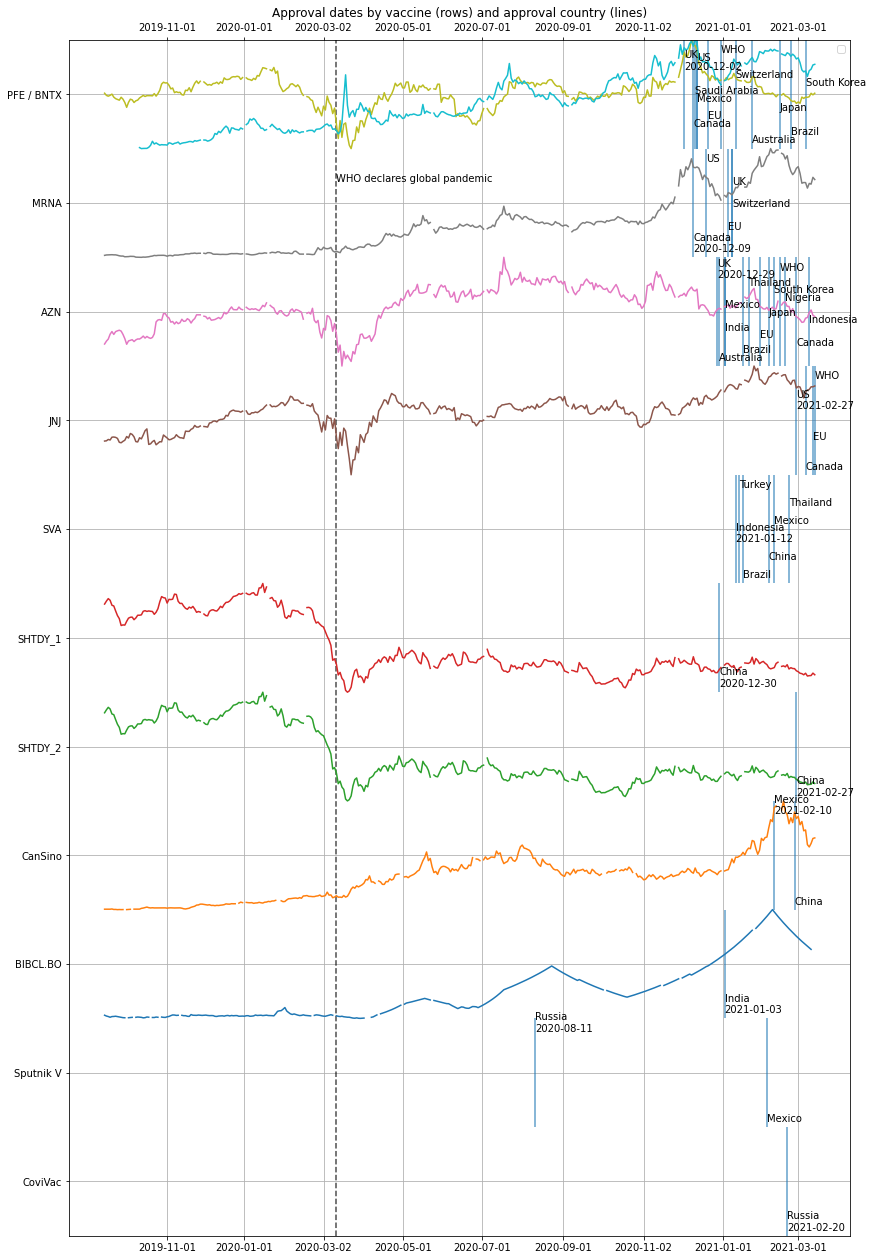

In [155]:
# To wrangle x-axis:
df_to_plot = df_all.copy()
df_to_plot.index = range(len(df_to_plot))

# create axis
fig, ax = plt.subplots(1,1, figsize=[14,22])

approval_dates_list = [PFE_approvals, MRNA_approvals, AZN_approvals, JNJ_approvals, SVA_approvals, 
                      SHTDY_approvals, SHTDY_2_approvals, CanSino_approvals, BIBCL_approvals, SputnikV_approvals, CoviVac_approvals]

for i, approval_dates, stock in zip(range(len(approval_dates_list[::-1])), approval_dates_list[::-1],
                                   [['PFE','BNTX'], ['MRNA'], ['AZN'], ['JNJ'], ['SVA'], ['SHTDY'],['SHTDY'],['6185_HK'],['BIBCL_BO'],[],[]][::-1]):
    plot_approvals_per_vaccine(approval_dates, ax, ymin=i, ymax=i+1)
    if len(stock) > 0:
        to_plot = ((df_to_plot[stock]-df_to_plot[stock].min(axis=0))/(df_to_plot[stock].max(axis=0)-df_to_plot[stock].min(axis=0))) + i
        ax.plot(to_plot.index, to_plot)
    
#ax.set_xlim(230, 390)
ax.set_ylim(0, len(approval_dates_list))
ax.set_yticks(np.arange(0.5, 11.5, 1))
ax.set_yticklabels(['PFE / BNTX', 'MRNA', 'AZN', 'JNJ', 'SVA', 'SHTDY_1', 'SHTDY_2', 'CanSino', 'BIBCL.BO', 'Sputnik V', 'CoviVac'][::-1])
#plt.gca().invert_yaxis()



# Set ticks on both sides of axes on
##ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
##xaxis_date_labels = ['2020-09-01', '2020-10-01','2020-11-02','2020-12-01','2021-01-01','2021-02-01','2021-03-01']
##index_vals = [df_all.index.get_loc(string) for string in xaxis_date_labels]
##ax.set_xticks(index_vals)
##ax.set_xticklabels(xaxis_date_labels)
#ax.set_xticklabels(df_all.index[list(np.arange(230,390,30))].strftime("%Y-%m-%d"))

ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
xaxis_date_labels = ['2019-11-01', '2020-01-01', '2020-03-02','2020-05-01','2020-07-01', '2020-09-01','2020-11-02','2021-01-01','2021-03-01']
index_vals = [df_all.index.get_loc(string) for string in xaxis_date_labels]
ax.set_xticks(index_vals)
#xaxis_date_labels = ['2020-09', '2020-10','2020-11','2020-12','2021-01','2021-02','2021-03']
ax.set_xticklabels(xaxis_date_labels)

ax.grid()
ax.set_title('Approval dates by vaccine (rows) and approval country (lines)')


ax.vlines(df_all.index.get_loc('2020-03-11'), 0, 11, color='k', linestyle='--', alpha=0.7)
ax.annotate('WHO declares global pandemic', (df_all.index.get_loc('2020-03-11'), 9.7))


plt.show()

### Sankey plot

In [159]:
from matplotlib.sankey import Sankey

In [175]:
['US/EU', 'US', 'UK', 'US/EU', 'China', 'China','China','China','India','Russia','Russia']

['US/EU',
 'US',
 'UK',
 'US/EU',
 'China',
 'China',
 'China',
 'China',
 'India',
 'Russia',
 'Russia']

In [205]:
list(zip(['US/EU', 'US', 'UK', 'US/EU', 'China', 'China','China','China','India','Russia','Russia'], approval_dates_list))

[('US/EU',
  {'Australia': '2021-01-25',
   'Brazil': '2021-02-23',
   'Canada': '2020-12-09',
   'EU': '2020-12-21',
   'Japan': '2021-02-14',
   'Mexico': '2020-12-11',
   'Saudi Arabia': '2020-12-10',
   'South Korea': '2021-03-05',
   'Switzerland': '2021-01-12',
   'UK': '2020-12-02',
   'US': '2020-12-11',
   'WHO': '2020-12-31'}),
 ('US',
  {'Canada': '2020-12-09',
   'EU': '2021-01-06',
   'Switzerland': '2021-01-08',
   'UK': '2021-01-08',
   'US': '2020-12-18'}),
 ('UK',
  {'Australia': '2020-12-30',
   'Brazil': '2021-01-17',
   'Canada': '2021-02-26',
   'EU': '2021-01-29',
   'India': '2021-01-03',
   'Indonesia': '2021-03-09',
   'Japan': '2021-02-05',
   'Mexico': '2021-01-04',
   'Nigeria': '2021-02-18',
   'South Korea': '2021-02-10',
   'Thailand': '2021-01-21',
   'UK': '2020-12-29',
   'WHO': '2021-02-15'}),
 ('US/EU',
  {'Canada': '2021-03-05',
   'EU': '2021-03-11',
   'US': '2021-02-27',
   'WHO': '2021-03-12'}),
 ('China',
  {'Brazil': '2021-01-17',
   'China': 

In [161]:
[['PFE','BNTX'], ['MRNA'], ['AZN'], ['JNJ'], ['SVA'], ['SHTDY'],['SHTDY'],['6185_HK'],['BIBCL_BO'],[],[]]

[['PFE', 'BNTX'],
 ['MRNA'],
 ['AZN'],
 ['JNJ'],
 ['SVA'],
 ['SHTDY'],
 ['SHTDY'],
 ['6185_HK'],
 ['BIBCL_BO'],
 [],
 []]

In [180]:
left_factor = 1/sum(vax_nums)
left_factor

0.09090909090909091

In [181]:
right_factor = 1/sum(approval_nums)
right_factor

0.020833333333333332

In [183]:
left_set = set(['US/EU', 'US', 'UK', 'US/EU', 'China', 'China','China','China','India','Russia','Russia'])
left_set

{'China', 'India', 'Russia', 'UK', 'US', 'US/EU'}

In [203]:
left_dict = {'China':4,'India':1,'Russia':2,'UK':1,'US':1,'US/EU':2}


In [201]:
right_set = set()
for subset in [set(approval_dates_list[i].keys()) for i in range(len(approval_dates_list))]:
    #print(type(outer_set))
    #print(type(subset))
    #print(subset)
    right_set = right_set.union(subset)
#print(right_set)

right_dict = dict()
for country in right_set:
    counter = sum([country in dates.keys() for dates in approval_dates_list])
    right_dict[country] = counter
print(right_dict)

{'Switzerland': 2, 'US': 3, 'Russia': 2, 'Australia': 2, 'WHO': 3, 'Thailand': 2, 'Turkey': 1, 'China': 4, 'UK': 3, 'Brazil': 3, 'EU': 4, 'South Korea': 2, 'Saudi Arabia': 1, 'Mexico': 5, 'Japan': 2, 'Canada': 4, 'Nigeria': 1, 'Indonesia': 2, 'India': 2}


In [204]:
print('Number of vaccines PRODUCED by:',left_dict)
print('Number of vaccines APPROVED by',right_dict)

Number of vaccines PRODUCED by: {'China': 4, 'India': 1, 'Russia': 2, 'UK': 1, 'US': 1, 'US/EU': 2}
Number of vaccines APPROVED by {'Switzerland': 2, 'US': 3, 'Russia': 2, 'Australia': 2, 'WHO': 3, 'Thailand': 2, 'Turkey': 1, 'China': 4, 'UK': 3, 'Brazil': 3, 'EU': 4, 'South Korea': 2, 'Saudi Arabia': 1, 'Mexico': 5, 'Japan': 2, 'Canada': 4, 'Nigeria': 1, 'Indonesia': 2, 'India': 2}


In [215]:
info_pack = list(zip(['US/EU', 'US', 'UK', 'US/EU', 'China', 'China','China','China','India','Russia','Russia'], [list(dates.keys()) for dates in approval_dates_list]))
print(info_pack)
print('\n')
print(*info_pack)

[('US/EU', ['Australia', 'Brazil', 'Canada', 'EU', 'Japan', 'Mexico', 'Saudi Arabia', 'South Korea', 'Switzerland', 'UK', 'US', 'WHO']), ('US', ['Canada', 'EU', 'Switzerland', 'UK', 'US']), ('UK', ['Australia', 'Brazil', 'Canada', 'EU', 'India', 'Indonesia', 'Japan', 'Mexico', 'Nigeria', 'South Korea', 'Thailand', 'UK', 'WHO']), ('US/EU', ['Canada', 'EU', 'US', 'WHO']), ('China', ['Brazil', 'China', 'Indonesia', 'Mexico', 'Thailand', 'Turkey']), ('China', ['China']), ('China', ['China']), ('China', ['China', 'Mexico']), ('India', ['India']), ('Russia', ['Mexico', 'Russia']), ('Russia', ['Russia'])]


('US/EU', ['Australia', 'Brazil', 'Canada', 'EU', 'Japan', 'Mexico', 'Saudi Arabia', 'South Korea', 'Switzerland', 'UK', 'US', 'WHO']) ('US', ['Canada', 'EU', 'Switzerland', 'UK', 'US']) ('UK', ['Australia', 'Brazil', 'Canada', 'EU', 'India', 'Indonesia', 'Japan', 'Mexico', 'Nigeria', 'South Korea', 'Thailand', 'UK', 'WHO']) ('US/EU', ['Canada', 'EU', 'US', 'WHO']) ('China', ['Brazil', 'Ch

In [232]:
pairs = [[(origin[0], dest) for dest in origin[1]] for origin in info_pack]
print(pairs)

counting_series = pd.DataFrame()
for pairings in pairs:
    counting_series = pd.concat([counting_series, pd.DataFrame(pairings)])
print('\n')    
print(counting_series)
print('\n')   
print(counting_series.value_counts().sort_index())

[[('US/EU', 'Australia'), ('US/EU', 'Brazil'), ('US/EU', 'Canada'), ('US/EU', 'EU'), ('US/EU', 'Japan'), ('US/EU', 'Mexico'), ('US/EU', 'Saudi Arabia'), ('US/EU', 'South Korea'), ('US/EU', 'Switzerland'), ('US/EU', 'UK'), ('US/EU', 'US'), ('US/EU', 'WHO')], [('US', 'Canada'), ('US', 'EU'), ('US', 'Switzerland'), ('US', 'UK'), ('US', 'US')], [('UK', 'Australia'), ('UK', 'Brazil'), ('UK', 'Canada'), ('UK', 'EU'), ('UK', 'India'), ('UK', 'Indonesia'), ('UK', 'Japan'), ('UK', 'Mexico'), ('UK', 'Nigeria'), ('UK', 'South Korea'), ('UK', 'Thailand'), ('UK', 'UK'), ('UK', 'WHO')], [('US/EU', 'Canada'), ('US/EU', 'EU'), ('US/EU', 'US'), ('US/EU', 'WHO')], [('China', 'Brazil'), ('China', 'China'), ('China', 'Indonesia'), ('China', 'Mexico'), ('China', 'Thailand'), ('China', 'Turkey')], [('China', 'China')], [('China', 'China')], [('China', 'China'), ('China', 'Mexico')], [('India', 'India')], [('Russia', 'Mexico'), ('Russia', 'Russia')], [('Russia', 'Russia')]]


         0             1
0    US

{'UK', 'US', 'Russia', 'India', 'China', 'US/EU'}
{'Switzerland', 'US', 'Russia', 'Australia', 'WHO', 'Thailand', 'Turkey', 'China', 'UK', 'Brazil', 'EU', 'South Korea', 'Saudi Arabia', 'Mexico', 'Japan', 'Canada', 'Nigeria', 'Indonesia', 'India'}


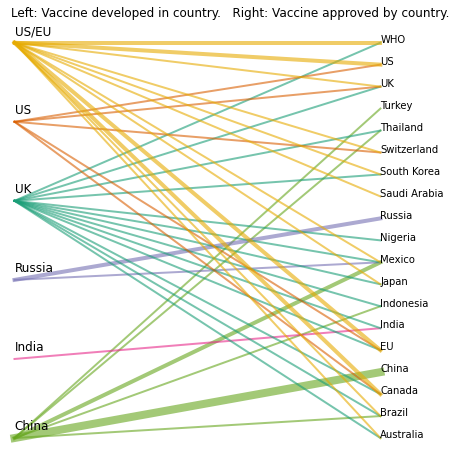

In [253]:
fig, ax = plt.subplots(figsize=[8,8])

left_y = pd.Series(np.linspace(0, 1, len(sorted(list(left_set)))))
left_y.index = sorted(list(left_set))
right_y = pd.Series(np.linspace(0, 1, len(sorted(list(right_set)))))
right_y.index = sorted(list(right_set))


for index, entry in counting_series.value_counts().sort_index().items():
    #print(index, entry)
    color_dict = {'UK':'#1b9e77', 'US':'#d95f02', 'Russia':'#7570b3', 'India':'#e7298a', 'China':'#66a61e', 'US/EU':'#e6ab02'}
    plt.plot([0,1], [left_y.loc[index[0]], right_y.loc[index[1]]], linewidth=entry*2, alpha=0.6, color=color_dict[index[0]])
    
for origin_country, y_left in left_y.items():
    plt.annotate(origin_country, (0, y_left+0.02), fontsize='large')
for dest_country, y_right in right_y.items():
    plt.annotate(dest_country, (1, y_right))

plt.xlim(-0.02, 1.2)
print(left_set)
print(right_set)
plt.title('Left: Vaccine developed in country.   Right: Vaccine approved by country.')
plt.axis('off')
plt.show()

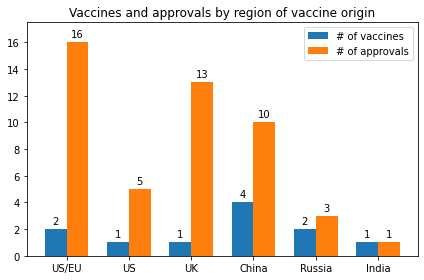

In [265]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['US/EU', 'US','UK', 'China', 'Russia', 'India']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [left_dict[label] for label in labels], width, label='# of vaccines')
rects2 = ax.bar(x + width/2, [counting_series.value_counts().sort_index().loc[(label,)].sum() for label in labels], width, label='# of approvals')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Scores')
ax.set_title('Vaccines and approvals by region of vaccine origin')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
ax.set_ylim(0,17.5)

plt.show()